In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from PIL import Image
import torchvision.transforms as transforms
import torchvision.models as models
from torchvision.utils import save_image

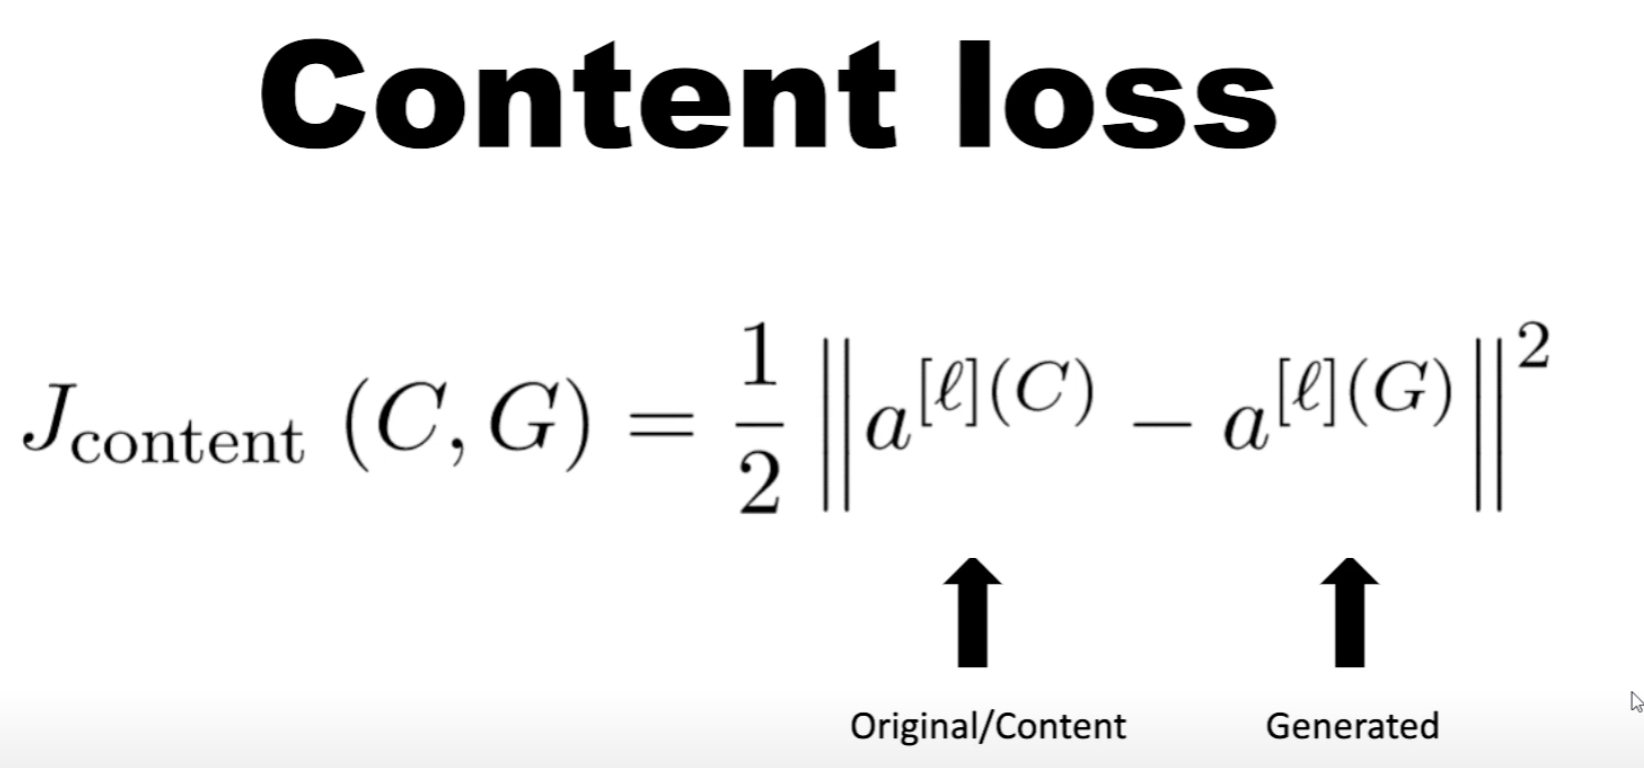

In [3]:
model=models.vgg19(pretrained=True).features
print(model)

/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG19_Weights.IMAGENET1K_V1`. You can also use `weights=VGG19_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Sequential(
  (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU(inplace=True)
  (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (3): ReLU(inplace=True)
  (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (6): ReLU(inplace=True)
  (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (8): ReLU(inplace=True)
  (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): ReLU(inplace=True)
  (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (13): ReLU(inplace=True)
  (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (15): ReLU(inplace=True)
  (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (17): ReLU(inplace=True)
  (18): MaxPoo

In [5]:
class VGG(nn.Module):
  def __init__(self):
        super(VGG,self).__init__()

        self.chosen_features=['0','5','10','19','28']
        self.model=models.vgg19(pretrained=True).features[:29]
  def forward(self,x):
    features=[]
    for layer_num,layer in enumerate(self.model):
      x=layer(x)

      if str(layer_num) in self.chosen_features:
        features.append(x)
    return features





In [8]:
def load_image(image_name):
  image=Image.open(image_name)
  image=loader(image).unsqueeze(0)
  return image.to(device)
device=torch.device("cuda"if torch.cuda.is_available else "cpu")
image_size=356
loader=transforms.Compose([
    transforms.Resize((image_size,image_size)),
    transforms.ToTensor
    #transform.Normalize(mean=[],std=[])
    ])


In [ ]:
original_img=load_image("")
style_img=load_image("")

In [11]:
model = VGG().to(device).eval()
generated=original_img.clone().requires_grad_(True)

/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG19_Weights.IMAGENET1K_V1`. You can also use `weights=VGG19_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


RuntimeError: ignored

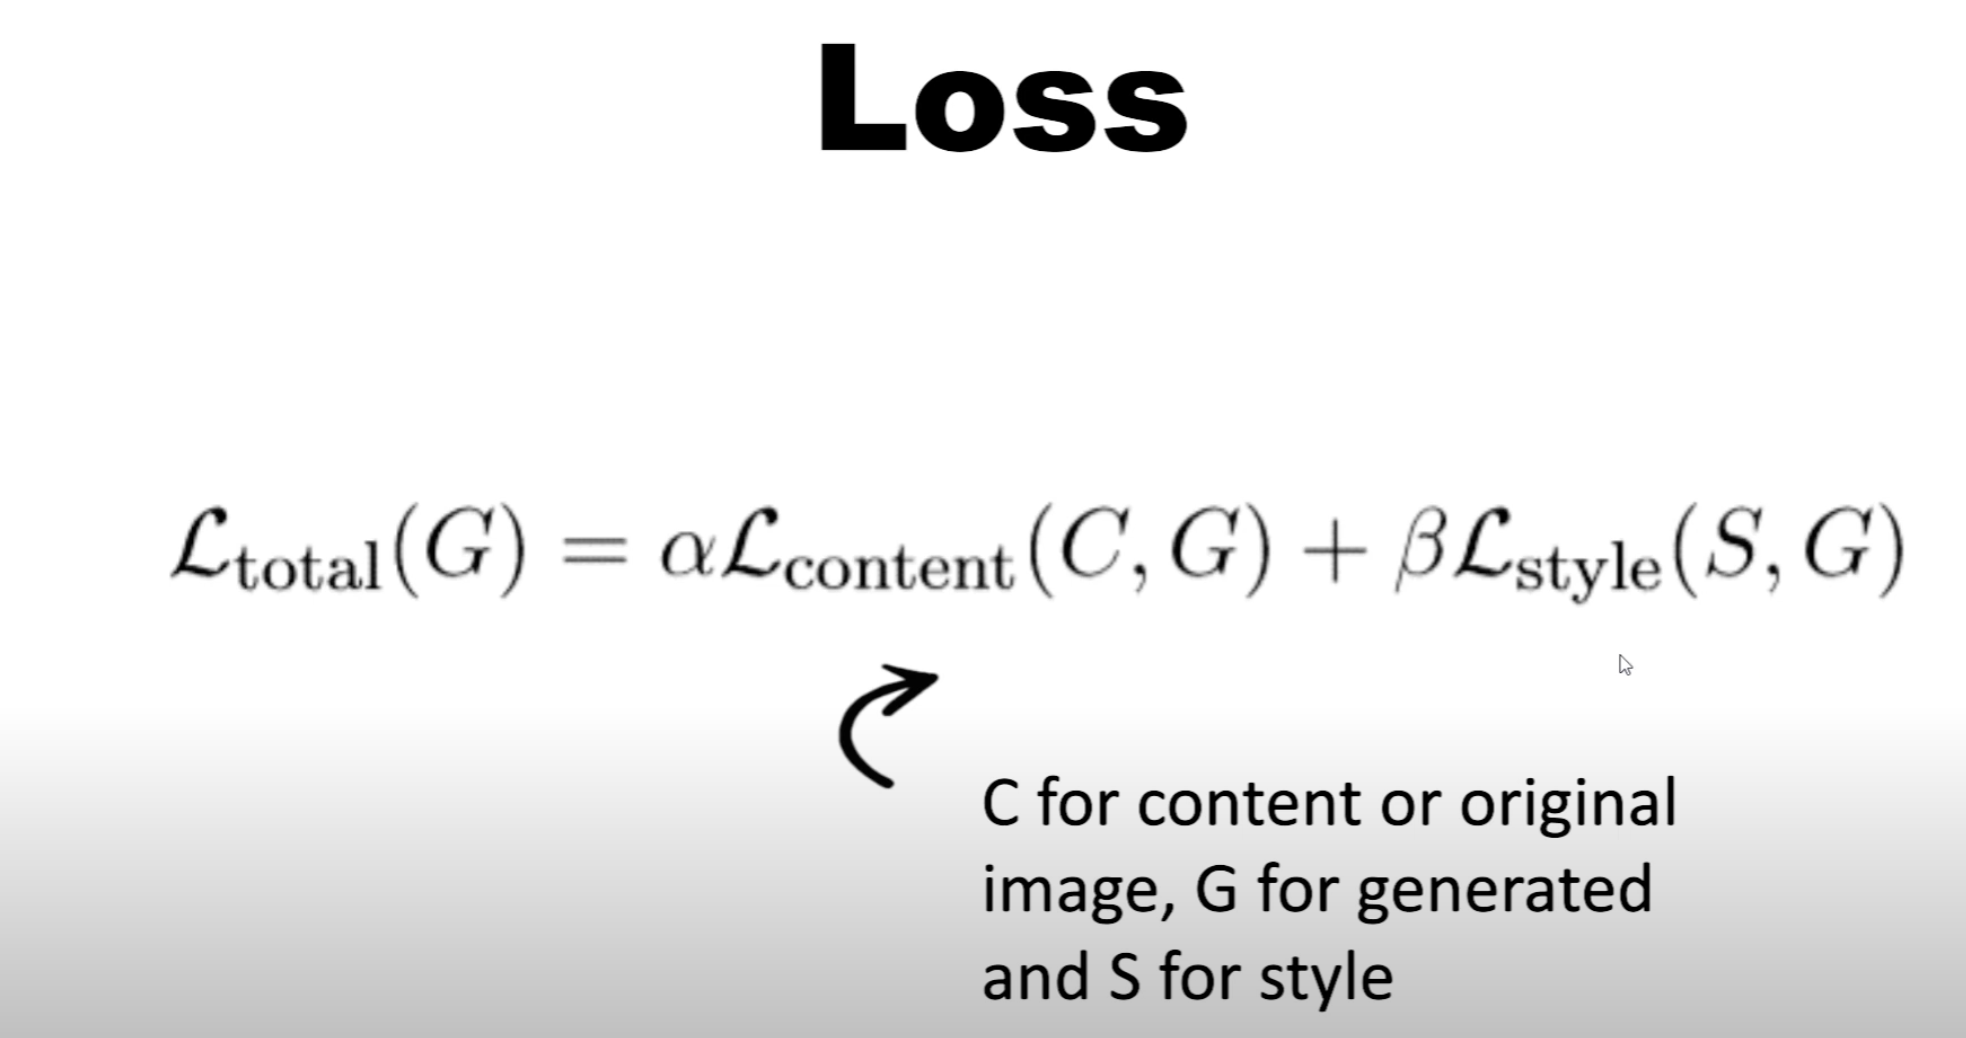

##HYPERPARAMETERS

In [10]:
total_steps = 6000
lr = 0.001
alpha = 1 #this is for content loss
beta = 0.01 #this is how much style do we want in image
optimizer=optim.Adam([generated],lr=lr)

for step in range(total_steps):
  generated_features = model(generated)
  original_img_features = model(original_img)
  style_features = model(style_img)

  style_loss = original_loss = 0
  
  for gen_feature,orig_feature,style_feature in zip(generated_features,original_img_features,style_features):
    batch_size,channel,height,width=gen_feature.shape
    original_loss += torch.mean((gen_feature - orig_feature)**2)

    #Compute Gram Matrix
    G = gen_feature.view(channel,height*width).mm(
        gen_feature.view(channel,height*width).t()) 
    A = style_feature.view(channel,height*width).mm(
        style_feature.view(channel,height*width).t()) 
    
    style_loss += torch.mean((G - A)**2)
  
  total_loss = alpha*original_loss + beta * style_loss
  optimizer.zero_grad()
  total_loss.backward()
  optimizer.step()

  if step %200 == 0:
    print(total_loss)
    save_image(generated,"generated.png")


NameError: ignored

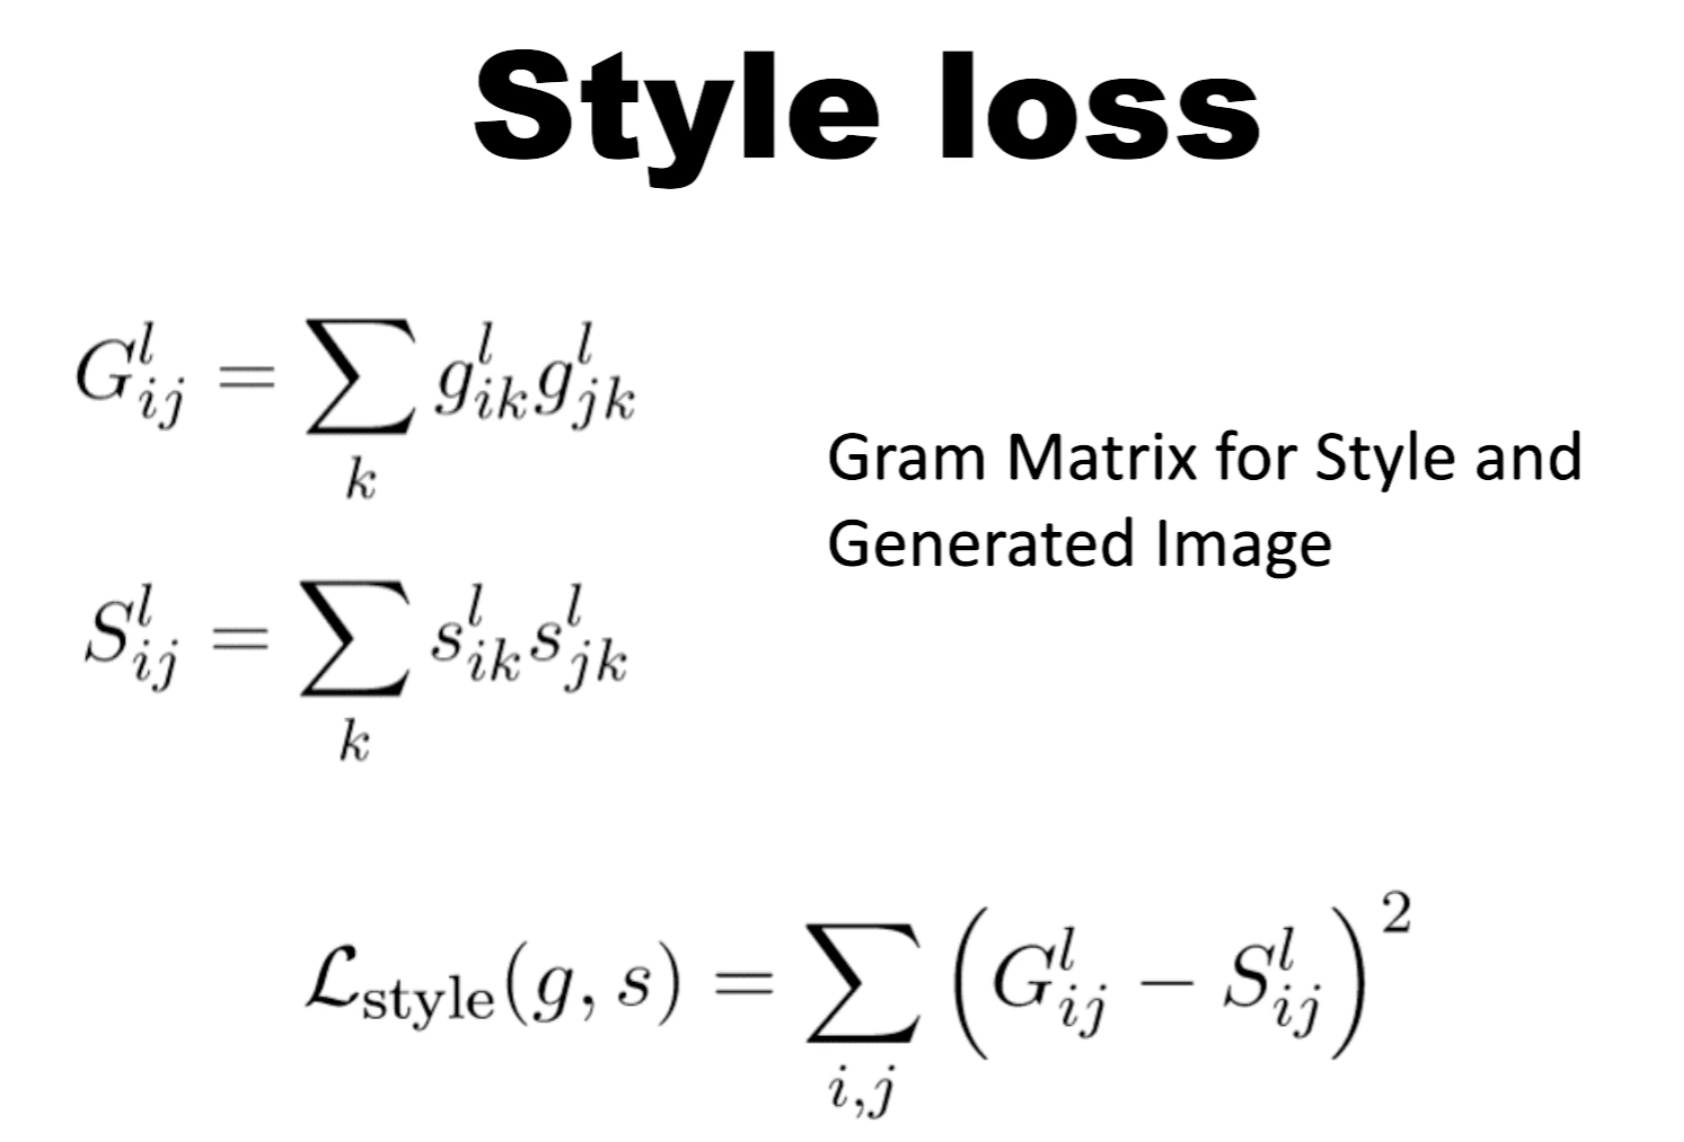